In [14]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load dataset into dataframe
df = pd.read_csv('homepage.csv')

In [3]:
df.head()

,Day,Control Cookies,Control Downloads,Control Licenses,Experiment Cookies,Experiment Downloads,Experiment Licenses
0,1,1764,246,1,1850,339,3
1,2,1541,234,2,1590,281,2
2,3,1457,240,1,1515,274,1
3,4,1587,224,1,1541,284,2
4,5,1606,253,2,1643,292,3


In [4]:
df.shape

(29, 7)

In [9]:
# calculate cookies of each group and total cookies
con_group = df['Control Cookies'].sum()
exp_group = df['Experiment Cookies'].sum()
total = con_group + exp_group

In [10]:
# proporsion of each group calculation
prop_con = con_group /total
prop_exp = exp_group /total
print([prop_con, prop_exp])

[0.4973725277875092, 0.5026274722124908]


In [12]:
# calculate difference of both group
mean_prop = prop_exp - prop_con
mean_prop

0.005254944424981645

In [13]:
# bootstraping to simulate data using binomial distribution
boot_con = np.random.binomial(con_group, 0.5, 10000)/con_group
boot_exp = np.random.binomial(exp_group, 0.5, 10000)/exp_group

diff = boot_con - boot_exp
diff

array([-0.00191388, -0.0031636 ,  0.00062482, ...,  0.00018224,
       -0.00180173, -0.00474723])

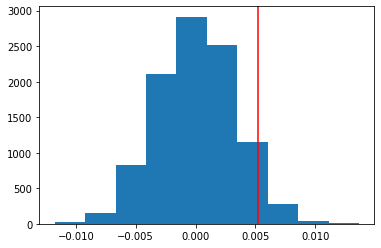

In [18]:
plt.hist(diff);
plt.axvline(mean_prop, color='red');

In [23]:
p_val = (diff > mean_prop).mean() + (diff < 0 - (mean_prop-0)).mean()

In [24]:
p_val

0.1049